## 1. Import Libraries


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset


In [84]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## *Copy df*

In [85]:
df2 = df.copy(deep=False)

## 3. Exploratory Data Analysis (EDA)


In [86]:
df.shape

(55500, 15)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [88]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,55500.0,51.539459,19.602454,13.00000,35.000000,52.000000,68.000000,89.000000
Billing Amount,55500.0,25539.316097,14211.454431,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736
Room Number,55500.0,301.134829,115.243069,101.00000,202.000000,302.000000,401.000000,500.000000


In [89]:
df.describe(include='O').transpose()

,count,unique,top,freq
Name,55500,49992,DAvId muNoZ,3
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Date of Admission,55500,1827,2024-03-16,50
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Discharge Date,55500,1856,2020-03-15,53


In [90]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

## 4. Outlier Detection (IQR Method)


In [91]:
df_num = df.select_dtypes(include="number")

In [92]:

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df_num[(df_num < lower_bound) | (df_num > upper_bound)]


outliers_clean = outliers.dropna(how='all')

outliers_clean


,Age,Billing Amount,Room Number


## 5. Data Cleaning and Dropping Columns


In [93]:
df.drop(columns=['Test Results','Name','Room Number'],inplace=True)
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin


## 6. Label Encoding


In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication
0,30,1,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol
1,62,1,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen
2,76,0,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin
3,28,0,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen
4,43,0,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin


## 7. Date Feature Engineering


In [95]:
df.dtypes.value_counts()

object     9
int64      2
float64    1
Name: count, dtype: int64

In [96]:
df_cat = df.select_dtypes('object')
df_cat

,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication
0,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,Urgent,2024-02-02,Paracetamol
1,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,Emergency,2019-08-26,Ibuprofen
2,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,Emergency,2022-10-07,Aspirin
3,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,Elective,2020-12-18,Ibuprofen
4,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,Urgent,2022-10-09,Penicillin
...,...,...,...,...,...,...,...,...,...
55495,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,Elective,2020-09-15,Penicillin
55496,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,Elective,2020-02-01,Aspirin
55497,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,Urgent,2020-08-10,Ibuprofen
55498,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,Elective,2019-05-31,Ibuprofen


In [97]:
print(df.columns)


Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Admission Type', 'Discharge Date', 'Medication'],
      dtype='object')


In [98]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Admission_Year'] = df['Date of Admission'].dt.year
df['Admission_Month'] = df['Date of Admission'].dt.month

df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Discharge_Year'] = df['Discharge Date'].dt.year
df['Discharge_Month'] = df['Discharge Date'].dt.month


df.drop(columns=['Date of Admission','Discharge Date'],inplace=True)
df.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month
0,30,1,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,Paracetamol,2024,1,2024,2
1,62,1,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,Ibuprofen,2019,8,2019,8
2,76,0,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,Aspirin,2022,9,2022,10
3,28,0,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,Ibuprofen,2020,11,2020,12
4,43,0,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,Penicillin,2022,9,2022,10


In [99]:
df_cat = df.select_dtypes('object')
df_cat

,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication
0,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,Urgent,Paracetamol
1,A+,Obesity,Samantha Davies,Kim Inc,Medicare,Emergency,Ibuprofen
2,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,Emergency,Aspirin
3,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,Elective,Ibuprofen
4,AB+,Cancer,Kathleen Hanna,White-White,Aetna,Urgent,Penicillin
...,...,...,...,...,...,...,...
55495,O+,Asthma,Joshua Jarvis,Jones-Thompson,Blue Cross,Elective,Penicillin
55496,AB-,Obesity,Taylor Sullivan,Tucker-Moyer,Cigna,Elective,Aspirin
55497,B+,Hypertension,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,Urgent,Ibuprofen
55498,O-,Arthritis,Kimberly Curry,"Jackson Todd and Castro,",Medicare,Elective,Ibuprofen


In [100]:
df.drop(columns=['Doctor','Hospital'],inplace=True)

In [101]:
df_num = df.select_dtypes(include=["int","float64"])
df_num = df_num.drop(columns='Gender')

In [102]:
df_num.columns

Index(['Age', 'Billing Amount', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month'],
      dtype='object')

## 8. Scaling Numerical Features


In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(data=df_scaled,columns=df_num.columns)
df_num_scaled

,Age,Billing Amount,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month
0,-1.098824,-0.470261,1.780122,-1.608576,1.747420,-1.318210
1,0.533639,0.570250,-1.559231,0.428167,-1.582907,0.427042
2,1.247842,0.169990,0.444381,0.719130,0.415289,1.008792
3,-1.200853,0.870465,-0.891360,1.301057,-0.916842,1.590543
4,-0.435636,-0.795211,0.444381,0.719130,0.415289,1.008792
...,...,...,...,...,...,...
55495,-0.486651,-1.610589,-0.891360,0.428167,-0.916842,0.717917
55496,0.482625,0.416462,-0.891360,-1.608576,-0.916842,-1.318210
55497,-0.690708,0.146464,-0.891360,0.137204,-0.916842,0.427042
55498,-0.435636,0.486357,-1.559231,-0.444723,-1.582907,-0.445584


## 9. One-Hot Encoding


In [104]:
df = pd.get_dummies(df)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,Age,Gender,Billing Amount,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month,Blood Type_A+,Blood Type_A-,Blood Type_AB+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30,1,18856.281306,2024,1,2024,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,62,1,33643.327287,2019,8,2019,8,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2,76,0,27955.096079,2022,9,2022,10,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,28,0,37909.782410,2020,11,2020,12,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,43,0,14238.317814,2022,9,2022,10,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [105]:
df.isna().sum()

Age                                    0
Gender                                 0
Billing Amount                         0
Admission_Year                         0
Admission_Month                        0
Discharge_Year                         0
Discharge_Month                        0
Blood Type_A+                          0
Blood Type_A-                          0
Blood Type_AB+                         0
Blood Type_AB-                         0
Blood Type_B+                          0
Blood Type_B-                          0
Blood Type_O+                          0
Blood Type_O-                          0
Medical Condition_Arthritis            0
Medical Condition_Asthma               0
Medical Condition_Cancer               0
Medical Condition_Diabetes             0
Medical Condition_Hypertension         0
Medical Condition_Obesity              0
Insurance Provider_Aetna               0
Insurance Provider_Blue Cross          0
Insurance Provider_Cigna               0
Insurance Provid

## 10. Final Dataset Assembly


In [106]:
df.drop(columns=df_num.columns,inplace=True)
df_cleaned = pd.concat([df.reset_index(drop=True), df_num_scaled.reset_index(drop=True)], axis=1)
df_cleaned

,Gender,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Arthritis,...,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Age,Billing Amount,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,-1.098824,-0.470261,1.780122,-1.608576,1.747420,-1.318210
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0.533639,0.570250,-1.559231,0.428167,-1.582907,0.427042
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1.247842,0.169990,0.444381,0.719130,0.415289,1.008792
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,-1.200853,0.870465,-0.891360,1.301057,-0.916842,1.590543
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,-0.435636,-0.795211,0.444381,0.719130,0.415289,1.008792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,-0.486651,-1.610589,-0.891360,0.428167,-0.916842,0.717917
55496,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.482625,0.416462,-0.891360,-1.608576,-0.916842,-1.318210
55497,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,-0.690708,0.146464,-0.891360,0.137204,-0.916842,0.427042
55498,1,0,0,0,0,0,0,0,1,1,...,1,0,0,0,-0.435636,0.486357,-1.559231,-0.444723,-1.582907,-0.445584


In [107]:
X = df_cleaned.copy()

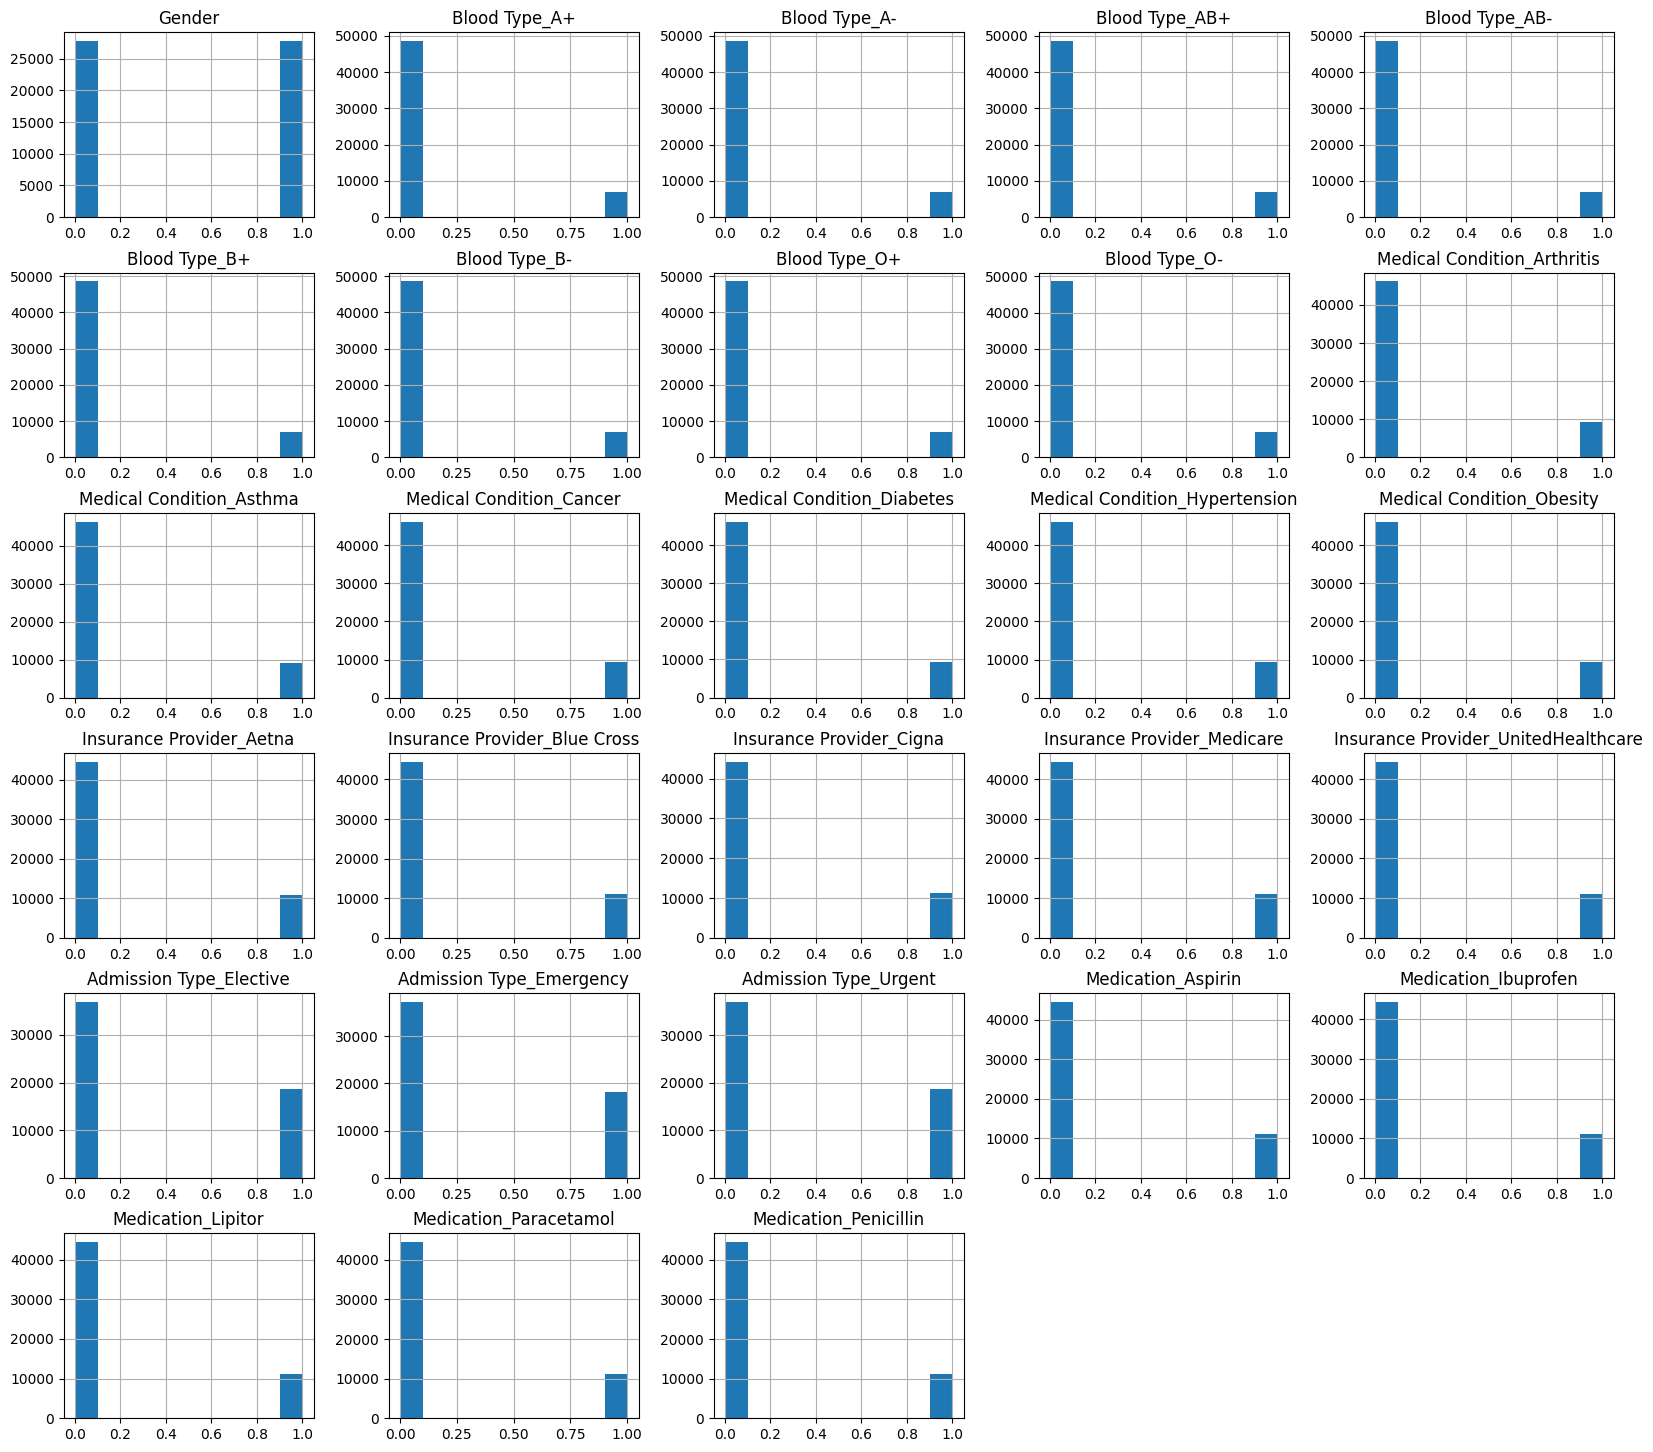

In [116]:
df.hist(figsize=(20,18))
plt.show()

## 12. Correlation Analysis


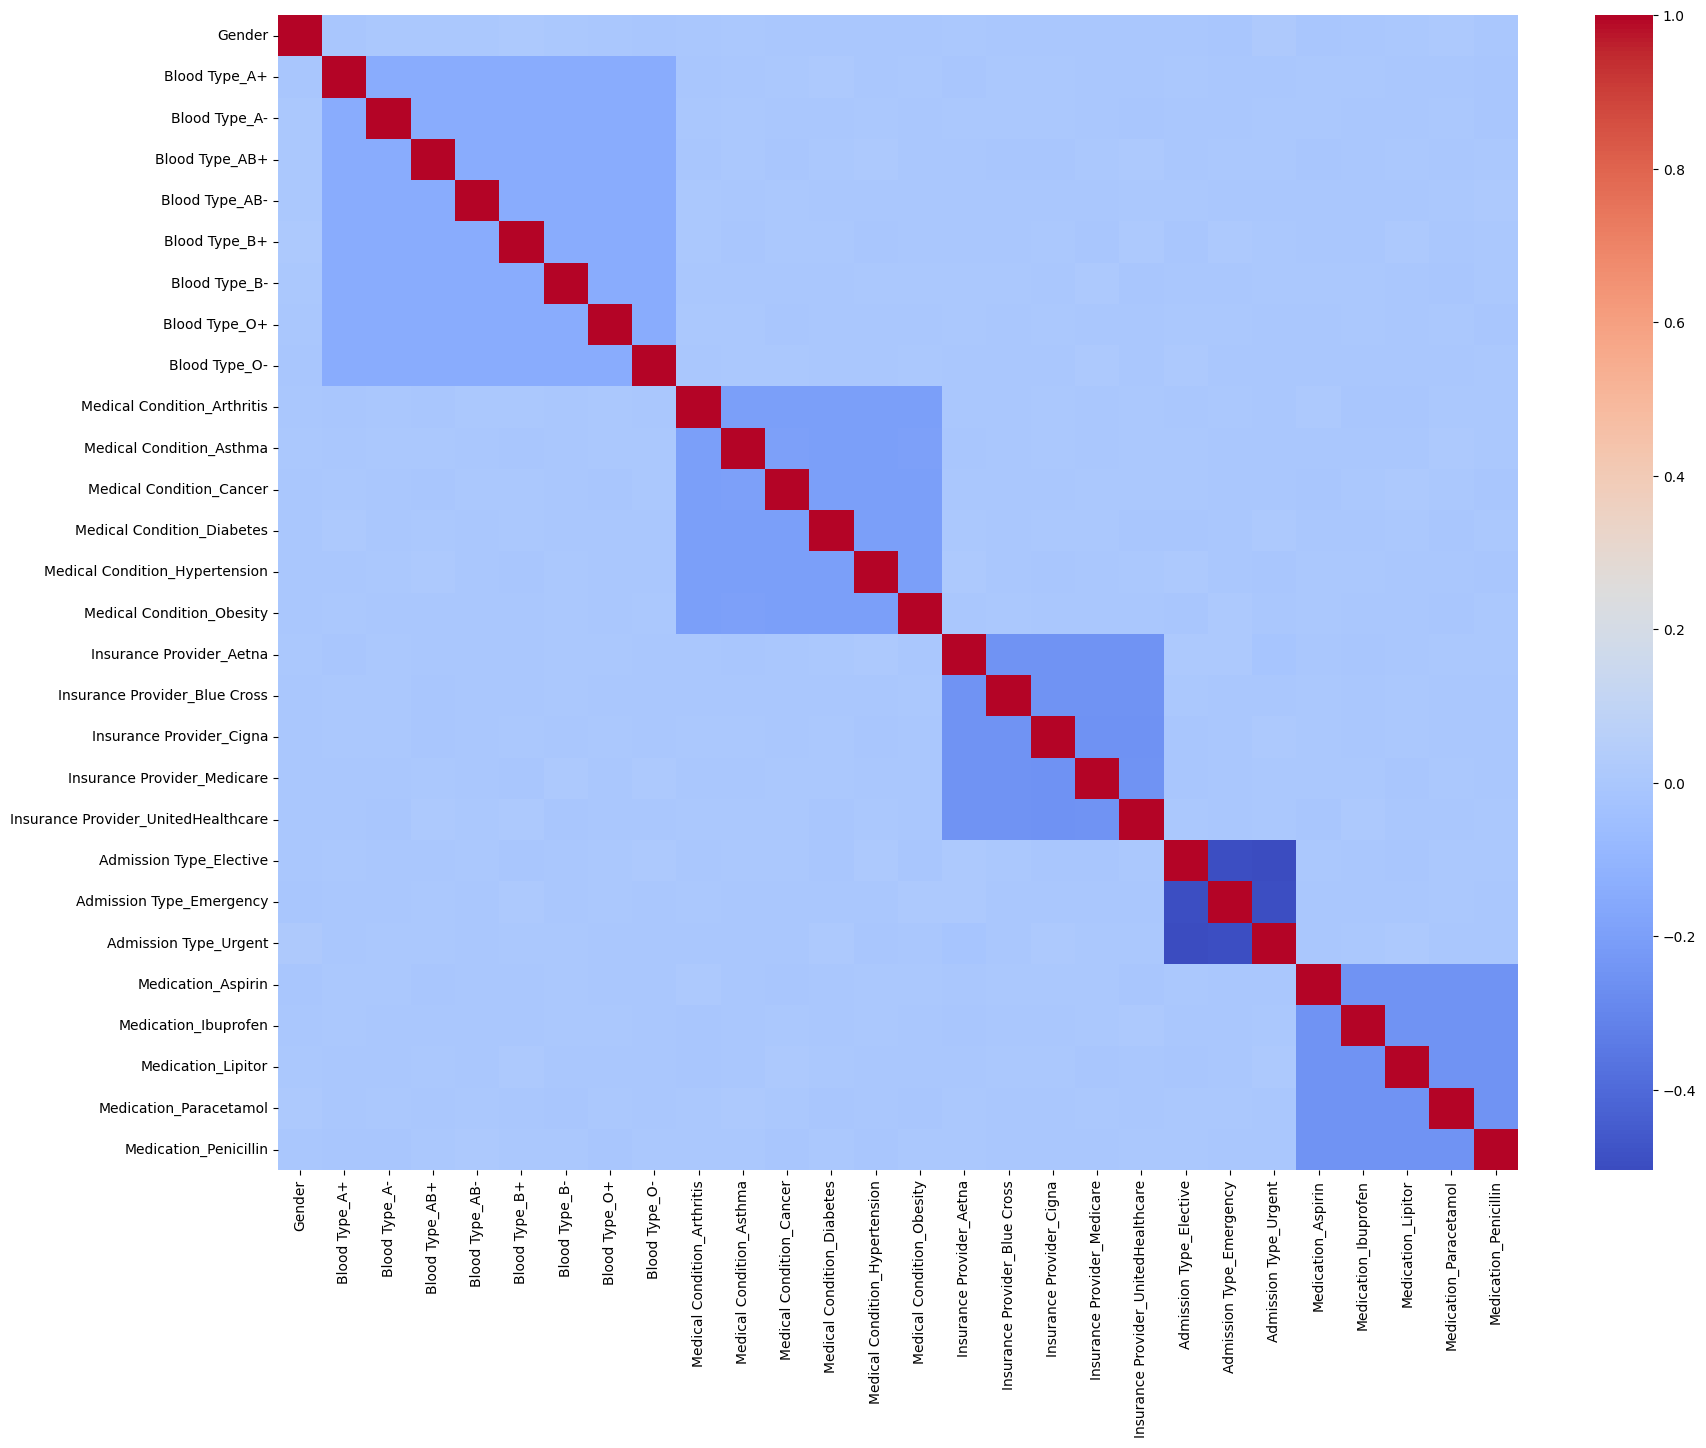

In [117]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


In [118]:
corr_matrix = df.corr()

# Loop through each pair of features
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j:  
            corr_value = corr_matrix.loc[i, j]
            if abs(corr_value) > 0.4:
                print(f"Strong correlation between [{i}] and [{j}]: {corr_value:.2f}")


Strong correlation between [Admission Type_Elective] and [Admission Type_Emergency]: -0.50
Strong correlation between [Admission Type_Elective] and [Admission Type_Urgent]: -0.50
Strong correlation between [Admission Type_Emergency] and [Admission Type_Elective]: -0.50
Strong correlation between [Admission Type_Emergency] and [Admission Type_Urgent]: -0.50
Strong correlation between [Admission Type_Urgent] and [Admission Type_Elective]: -0.50
Strong correlation between [Admission Type_Urgent] and [Admission Type_Emergency]: -0.50


## 13. K-Means: Elbow Method


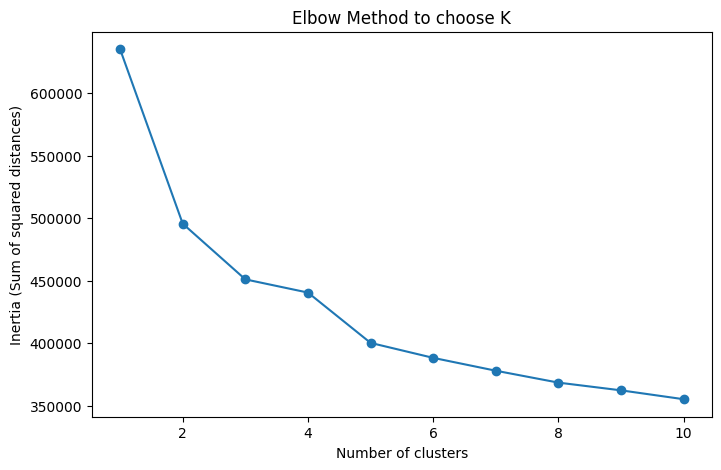

In [119]:
from sklearn.cluster import KMeans
inertia = []
K_range = range(1, 11)  # try 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method to choose K')
plt.show()


## 14. K-Means Clustering (k = 4)


In [120]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df)
df

,Gender,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Arthritis,...,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,cluster
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,2
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,2
55496,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,2
55497,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
55498,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,2


In [121]:
df['cluster'].value_counts()


cluster
2    18655
1    18269
3    11894
0     6682
Name: count, dtype: int64

## 15. PCA 2D Visualization


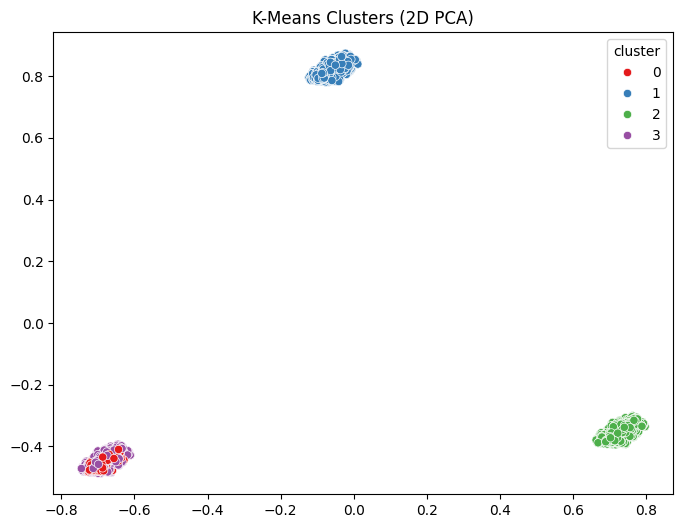

In [122]:
from sklearn.decomposition import PCA


X_scaled = df.drop(columns='cluster')

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set1')
plt.title('K-Means Clusters (2D PCA)')
plt.show()


## 16. Cluster Statistics


In [126]:
for i in df.columns:
    print(df.groupby('cluster')[i].mean())
    print('===========================================')


cluster
0    0.500599
1    0.494006
2    0.497507
3    0.514797
Name: Gender, dtype: float64
cluster
0    0.123616
1    0.125404
2    0.125704
3    0.125610
Name: Blood Type_A+, dtype: float64
cluster
0    0.131398
1    0.124199
2    0.125543
3    0.124432
Name: Blood Type_A-, dtype: float64
cluster
0    0.123167
1    0.125568
2    0.123184
3    0.128804
Name: Blood Type_AB+, dtype: float64
cluster
0    0.121521
1    0.124090
2    0.127848
3    0.124517
Name: Blood Type_AB-, dtype: float64
cluster
0    0.127058
1    0.129016
2    0.120397
3    0.125525
Name: Blood Type_B+, dtype: float64
cluster
0    0.124065
1    0.124035
2    0.124685
3    0.128048
Name: Blood Type_B-, dtype: float64
cluster
0    0.131398
1    0.125842
2    0.125060
3    0.118295
Name: Blood Type_O+, dtype: float64
cluster
0    0.117779
1    0.121846
2    0.127580
3    0.124769
Name: Blood Type_O-, dtype: float64
cluster
0    0.164172
1    0.170124
2    0.165264
3    0.169834
Name: Medical Condition_Arthritis, dtype:

------------------

## 17. Cluster Characteristics Summary
------------------






### **Cluster 0**
- **Admission Type:** Urgent
- **Insurance Provider:** Mainly Blue Cross
- **Medication Usage:** High usage of Ibuprofen and Lipitor
- **Medical Conditions:** Average
- **Gender / Blood Type:** Roughly balanced, no distinguishing patterns
- **Summary:** Urgent patients with Blue Cross insurance, using Ibuprofen/Lipitor.

---

### **Cluster 1**
- **Admission Type:** Emergency
- **Insurance Provider:** Mixed
- **Medication Usage:** Moderate
- **Medical Conditions:** Slightly higher chronic conditions (Arthritis, Asthma, Obesity)
- **Gender / Blood Type:** Roughly balanced
- **Summary:** Emergency patients with diverse insurance, slightly higher chronic conditions.

---

### **Cluster 2**
- **Admission Type:** Elective
- **Insurance Provider:** Low usage across providers
- **Medication Usage:** Low
- **Medical Conditions:** Average
- **Gender / Blood Type:** Roughly balanced
- **Summary:** Elective admission patients, generally healthier and low medication usage.

---

### **Cluster 3**
- **Admission Type:** Urgent
- **Insurance Provider:** Cigna, Medicare, UnitedHealthcare, Aetna
- **Medication Usage:** High across multiple medications
- **Medical Conditions:** Slightly more diabetes
- **Gender / Blood Type:** Roughly balanced
- **Summary:** Urgent patients with diverse insurance, high medication usage.


----

## 18. Cluster Naming


In [127]:
# Define a dictionary mapping cluster number to meaningful names
cluster_names = {
    0: 'Urgent_BlueCross_HighMed',
    1: 'Emergency_MixedInsurance_Chronic',
    2: 'Elective_LowMed_Healthy',
    3: 'Urgent_MultiInsurance_HighMed'
}

# Create a new column with cluster names
df['cluster_name'] = df['cluster'].map(cluster_names)

# Check the mapping
df[['cluster', 'cluster_name']].head()


,cluster,cluster_name
0,0,Urgent_BlueCross_HighMed
1,1,Emergency_MixedInsurance_Chronic
2,1,Emergency_MixedInsurance_Chronic
3,2,Elective_LowMed_Healthy
4,3,Urgent_MultiInsurance_HighMed


## 19. Final Labeled Dataset


In [128]:
df.head()

,Gender,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Arthritis,...,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,cluster,cluster_name
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,Urgent_BlueCross_HighMed
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Emergency_MixedInsurance_Chronic
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,Emergency_MixedInsurance_Chronic
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,2,Elective_LowMed_Healthy
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,3,Urgent_MultiInsurance_HighMed


----

# **By Ahmed Ameen**

- [LinkedIn](https://www.linkedin.com/in/ahmed-ameen--003845303)  
- [GitHub](https://github.com/ahmedkhaled00007)


---